In this notebook, let's look at the first question. What is the busiest time to visit Seattle, and does it relate to airbnb price?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/calendar_Seattle.csv
/kaggle/input/listings_Boston.csv
/kaggle/input/reviews_Seattle.csv
/kaggle/input/reviews_Boston.csv
/kaggle/input/calendar_Boston.csv
/kaggle/input/listings_Seattle.csv


We firstly read the file "calendar_Seattle.csv". It only has four columns. The first one is the listing id number.
The second one is the date, so here we specially put it into a datatype of datetime. The third one is the avaliablity of the
certain property. And the last column is the price. So clearly when a property is occupied and not available, the price will be NaN.

In [2]:
calendar_Sea = pd.read_csv("/kaggle/input/calendar_Seattle.csv",parse_dates=['date'])
print(calendar_Sea.head(5))
print(calendar_Sea.dtypes)

   listing_id       date available   price
0      241032 2016-01-04         t  $85.00
1      241032 2016-01-05         t  $85.00
2      241032 2016-01-06         f     NaN
3      241032 2016-01-07         f     NaN
4      241032 2016-01-08         f     NaN
listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object


So when we detaily dig into the data, we found there are 3818 unique listings. The date is from January 4th 2016 to January 2nd 2017.
But there are still 365 days, and the reason is 2016 has February 29th. The total number of observations is 365*3818 = 1393570. So clearly there is one data observation for each single listing on the whole timeline. 
For the availability, we can see, in total, 67% of the observations are available. So looks like in general, airbnb in Seattle is not super busy.

In [3]:
price_trend = calendar_Sea.copy()
print("The number of listings is", price_trend['listing_id'].nunique())
print("The number of unique dates is",price_trend['date'].nunique())
print("The date is from ",price_trend['date'].min(), " to ", price_trend['date'].max())
print(price_trend.shape)
print(price_trend['available'].value_counts())

The number of listings is 3818
The number of unique dates is 365
The date is from  2016-01-04 00:00:00  to  2017-01-02 00:00:00
(1393570, 4)
t    934542
f    459028
Name: available, dtype: int64


Since when a property is available, its price will not be a NaN. So we can do some accounting based on the date.
First we just drop all the observations when price is NaN. And then we cleaned the price column by converting them 
into valid float numbers. Then we grouped that data by date and calculate the statistics, including the mean, median, maximum, minimum,
and standard deviation, of the prices of each day. We also do a count of a daily number of available properties to have a picture of the 
trend of airbnb availability during the whole year.

In [4]:
price_df = price_trend.dropna(subset=['price'],axis=0)
price_df['price'] = price_df['price'].str.replace('[\$,]', '').astype('float')
price = price_df.groupby('date').agg({'price':['mean','std','max','min','median'],'date':['count']})
price.columns=['price_mean','price_std','price_max','price_min','price_median','space_count']
price=price.reset_index()
print(price.head())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


        date  price_mean  price_std  price_max  price_min  price_median  \
0 2016-01-04  122.085879  87.060202      975.0       25.0          99.0   
1 2016-01-05  120.681307  84.724152      950.0       25.0          99.0   
2 2016-01-06  120.928258  84.614619      950.0       25.0          99.0   
3 2016-01-07  120.958896  83.346965      950.0       22.0          99.0   
4 2016-01-08  127.640853  89.309234      950.0       20.0         100.0   

   space_count  
0         1735  
1         1867  
2         1826  
3         1776  
4         1782  


In the figures below, we plotted the average airbnb price, the median airbnb price, and the number of abailable airbnb properties 
as a function of time. Very interestingly, it seems like early spring is the bueiest time to visit Seattle. And the number of available properties gradually increases to a local minimum on April. Correspondingly, the average and median price increased slowly during the whole spring. Here we cannot be sure whether the price determines the traveller flow volume or vice versa. But it is a resonable inference that people will make decision easily when they saw a relative lower price. And the price also exhibits a weekly periodic behavior, where weekends have higher prices. 

Another interesting finding is, from April to July, the average price continue increasing. The number of available properties exhibited two bluff descent. One is around July 4th, which is very resonable since it is a public holiday. Another is around April 1st. I am not sure whether people just want to take a break on the April Fool's day to avoid those pranks. A more reasonable explanation is most colleges and universities are having spring break around that time. 

The prices were very stable during the summer and begin to decrease around September and reached another stable stage in November and December. The available numbers graudally increased during the whole autumn and until the end of 2016. That might be sue to most people prefer to get to home and celebrate Thanksgiving and Christmas with family. The relative low prices might be a corrsponding promotion strategy. But you may find after January 1st, both the available number and the price begin to have a same decreasing trend again. 

Text(2016-04-01, 2890, 'April 1st')

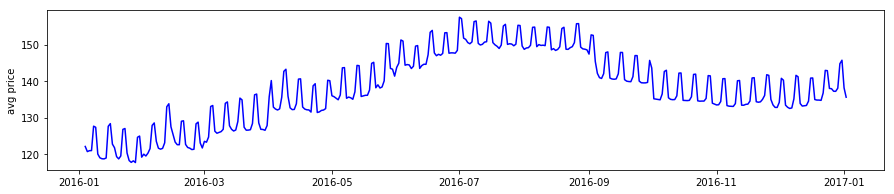

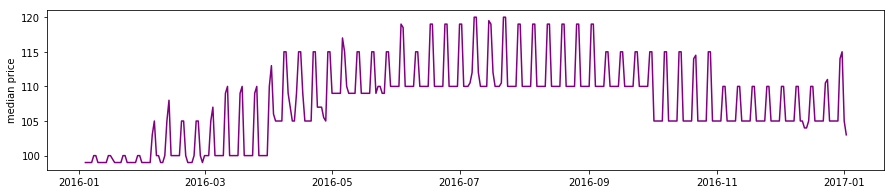

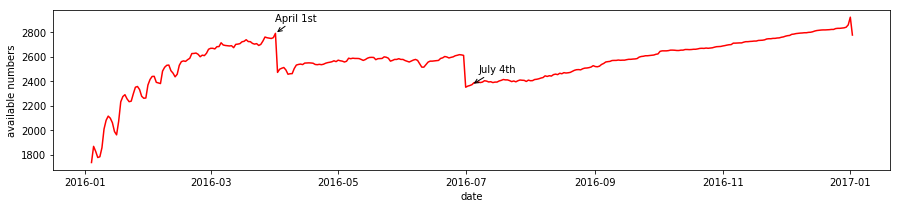

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot('date','price_mean',data=price,color='blue')
plt.ylabel("avg price")
plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
plt.plot('date','price_median',data=price,color='purple')
plt.ylabel("median price")
plt.figure(figsize=(15,10))
plt.subplot(3,1,3)
plt.plot('date','space_count',data=price,color='red')
plt.xlabel("date")
plt.ylabel("available numbers")
plt.annotate('July 4th',xy=("2016-07-04",price[price['date']=="2016-07-04"].iloc[0]['space_count']),
             xytext=("2016-07-07",price[price['date']=="2016-07-04"].iloc[0]['space_count']+100),arrowprops=dict(facecolor='black',arrowstyle="->"))
plt.annotate('April 1st',xy=("2016-04-01",price[price['date']=="2016-04-01"].iloc[0]['space_count']),
             xytext=("2016-04-01",price[price['date']=="2016-04-01"].iloc[0]['space_count']+100),arrowprops=dict(facecolor='black',arrowstyle="->"))

In conclusion, the busiest time and economical benetifical time is early spring. Summer has the highest price but actually not the 
busiest season. Definitly, the price exhibited some seasonal pattern but doesn't exactly follow the trend of traveller flow volume. And one thing to note is the standard deviation of the price in each day is quite large, which means time is just one factor and there are more factors largely impact the price. 